### Loading The Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

### Loading The Data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("Shape of Train Images:", X_train.shape)
print("Shape of Test Images:", X_test.shape)

Shape of Train Images: (60000, 28, 28)
Shape of Test Images: (10000, 28, 28)


Data Preprocessing and Visualization

In [ ]:
#Checking The Null Values
np.isnan(X_train).sum() # No Null Values

0

In [ ]:
# Flatten the images from 28x28 to 784
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print("Shape of train images after flatten:", X_train.shape)
print("Shape of test images after flatten:", X_test.shape)

Shape of train images after flatten: (60000, 784)
Shape of test images after flatten: (10000, 784)


In [ ]:
print("Random data sample before normalizing the data: \n", X_train[0])

Random data sample before normalizing the data: 
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 

In [ ]:
# Normalize the pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print("Random data sample after normalizing the data: \n", X_train[0])

Random data sample after normalizing the data: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.    

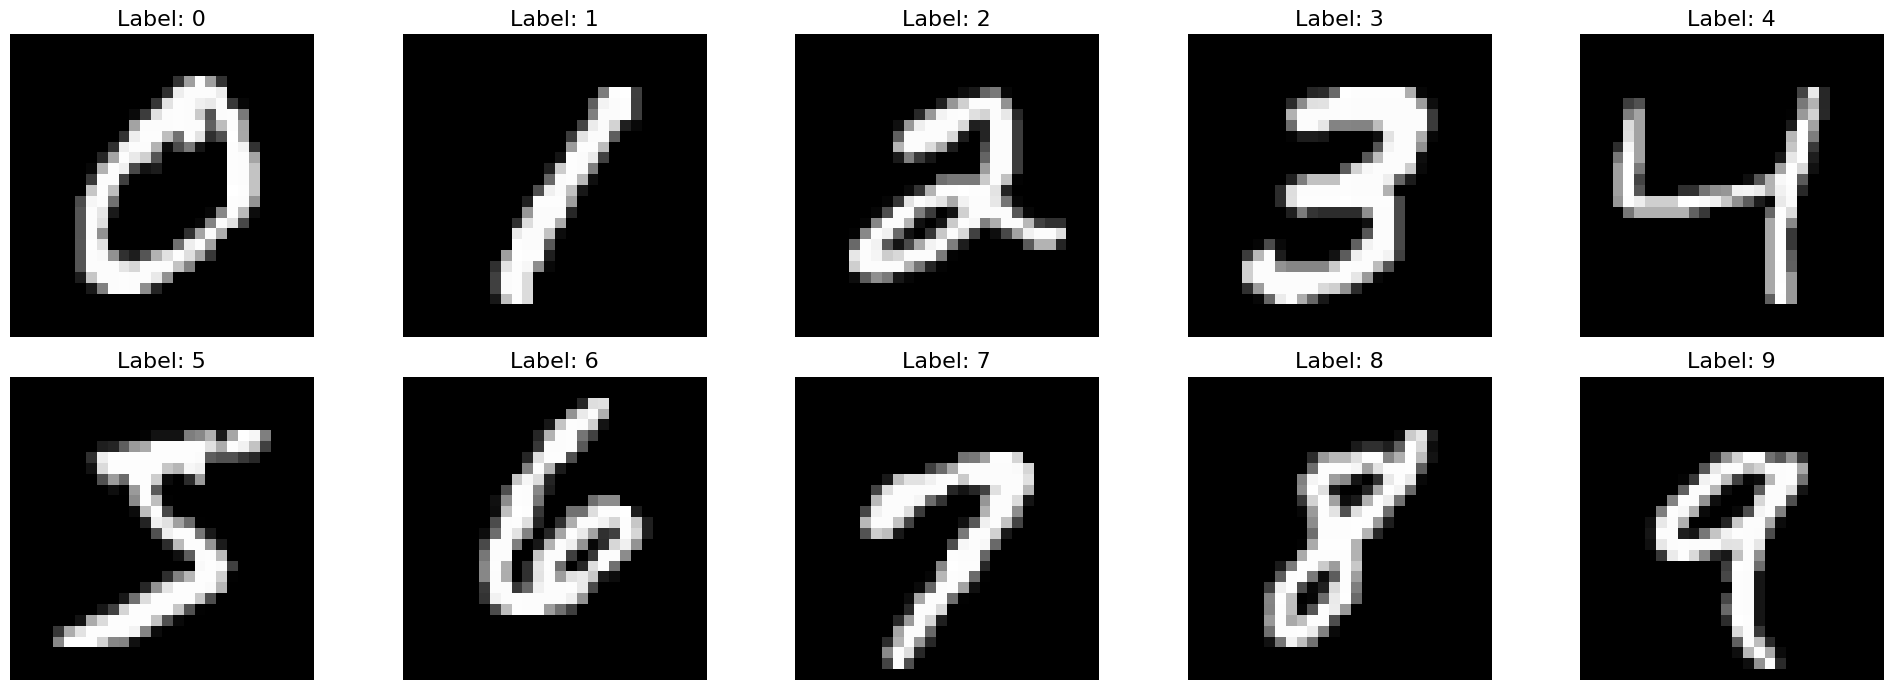

In [ ]:
#plotting all the dataset unqiue labels
unique_labels = np.unique(y_train)
unique_samples = [X_train[np.where(y_train == label)[0][0]] for label in unique_labels]

# Plot the unique labels
plt.figure(figsize=(20, 7))  # Set the figure size
for i, (img, label) in enumerate(zip(unique_samples, unique_labels)):
    plt.subplot(2, 5, i + 1)  # Create a 2x5 grid for subplots
    plt.imshow(np.reshape(img, (28, 28)), cmap='gray')  # Reshape and display the image
    plt.title(f"Label: {label}", fontsize=16)  # Add title with label
    plt.axis('off')  # Turn off axis display
plt.tight_layout()  # Adjust layout
plt.show()  # Display the figure

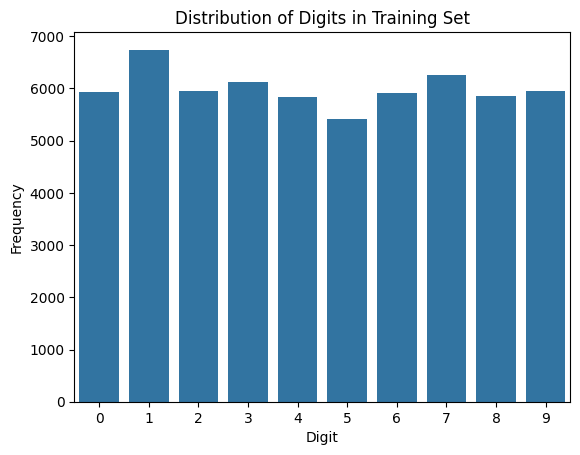

In [ ]:
#Plotting the count of labels in training set
train_label_counts = pd.Series(y_train).value_counts()
sns.barplot(x=train_label_counts.index, y=train_label_counts.values)
plt.title("Distribution of Digits in Training Set")
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.show()

In [ ]:

#Plotting the percentage of each digit
train_label_counts = pd.Series(y_train).value_counts()

total_labels = train_label_counts.sum()
percentage_labels = (train_label_counts / total_labels) * 100
percentage_labels = percentage_labels.map(lambda x: f"{x:.1f}%")
print("Percentage of each digit:")
print(percentage_labels)

Percentage of each digit:
1    11.2%
7    10.4%
3    10.2%
2     9.9%
9     9.9%
0     9.9%
6     9.9%
8     9.8%
4     9.7%
5     9.0%
Name: count, dtype: object


# Models



### choosing Defferent K Values

In [ ]:
#Experiment with Different K Values
k_values = [5, 7, 9]
for k in k_values:
    print(f'KNN Model Evaluation using K = {k}\n')

    knn_model = KNeighborsClassifier(n_neighbors=k)

    knn_model.fit(X_train, y_train)

    model_pred = knn_model.predict(X_test)

    print('Classification Report:')
    print(classification_report(y_test, model_pred))
    print('----------------------------------------------')




KNN Model Evaluation using K = 5

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

----------------------------------------------
KNN Model Evaluation using K = 7

Classification Report:
              precision    recall  f1-score   support

           0       0.97  

### Models without applay PCA

In [ ]:
model_results = []

In [ ]:

def train_evaluate_model(name, model, train_data, train_labels, test_data, test_labels):
    print(f'Training And Evaluating The {name} Model:')

    model.fit(train_data, train_labels)

    model_pred = model.predict(test_data)

    print('Classification Report:')
    print(classification_report(test_labels, model_pred))

    accuracy = accuracy_score(test_labels, model_pred)
    recall = recall_score(test_labels, model_pred, average="weighted", zero_division=0)
    f1 = f1_score(test_labels, model_pred, average="weighted", zero_division=0)
    error_rate = 1 - accuracy

    model_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Recall': recall,
        'F1-Score': f1,
        'Error Rate': error_rate
    })

In [ ]:
def plot_model_results(results):
    results_df = pd.DataFrame(results)

    plt.figure(figsize=(15, 10))

    # Accuracy Plot
    plt.subplot(2, 2, 1)
    sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
    plt.title('Accuracy of Different Models')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)

    # Error Rate Plot
    plt.subplot(2, 2, 2)
    sns.barplot(x='Model', y='Error Rate', data=results_df, palette='coolwarm')
    plt.title('Error Rate of Different Models')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)

    # F1-Score Plot
    plt.subplot(2, 2, 3)
    sns.barplot(x='Model', y='F1-Score', data=results_df, palette='Spectral')
    plt.title('F1-Score of Different Models')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)

    # Recall Plot
    plt.subplot(2, 2, 4)
    sns.barplot(x='Model', y='Recall', data=results_df, palette='cubehelix')
    plt.title('Recall of Different Models')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()


In [ ]:
#KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
train_evaluate_model('KNN', knn, X_train, y_train, X_test, y_test)

Training And Evaluating The KNN Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
#SVM Model
svm = SVC(kernel='rbf', gamma='scale')
train_evaluate_model('SVM', svm, X_train,y_train,X_test,y_test)

Training And Evaluating The SVM Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
log_reg = LogisticRegression(max_iter=10000)
train_evaluate_model('Logistic Regression', log_reg, X_train,y_train,X_test,y_test)

Training And Evaluating The Logistic Regression Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.93      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



<ipython-input-25-a80f2e280b27>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
<ipython-input-25-a80f2e280b27>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Error Rate', data=results_df, palette='coolwarm')
<ipython-input-25-a80f2e280b27>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1-Score', data=results_df, palette='Spectral')
<ipython-input-25-a80f2e280b27>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

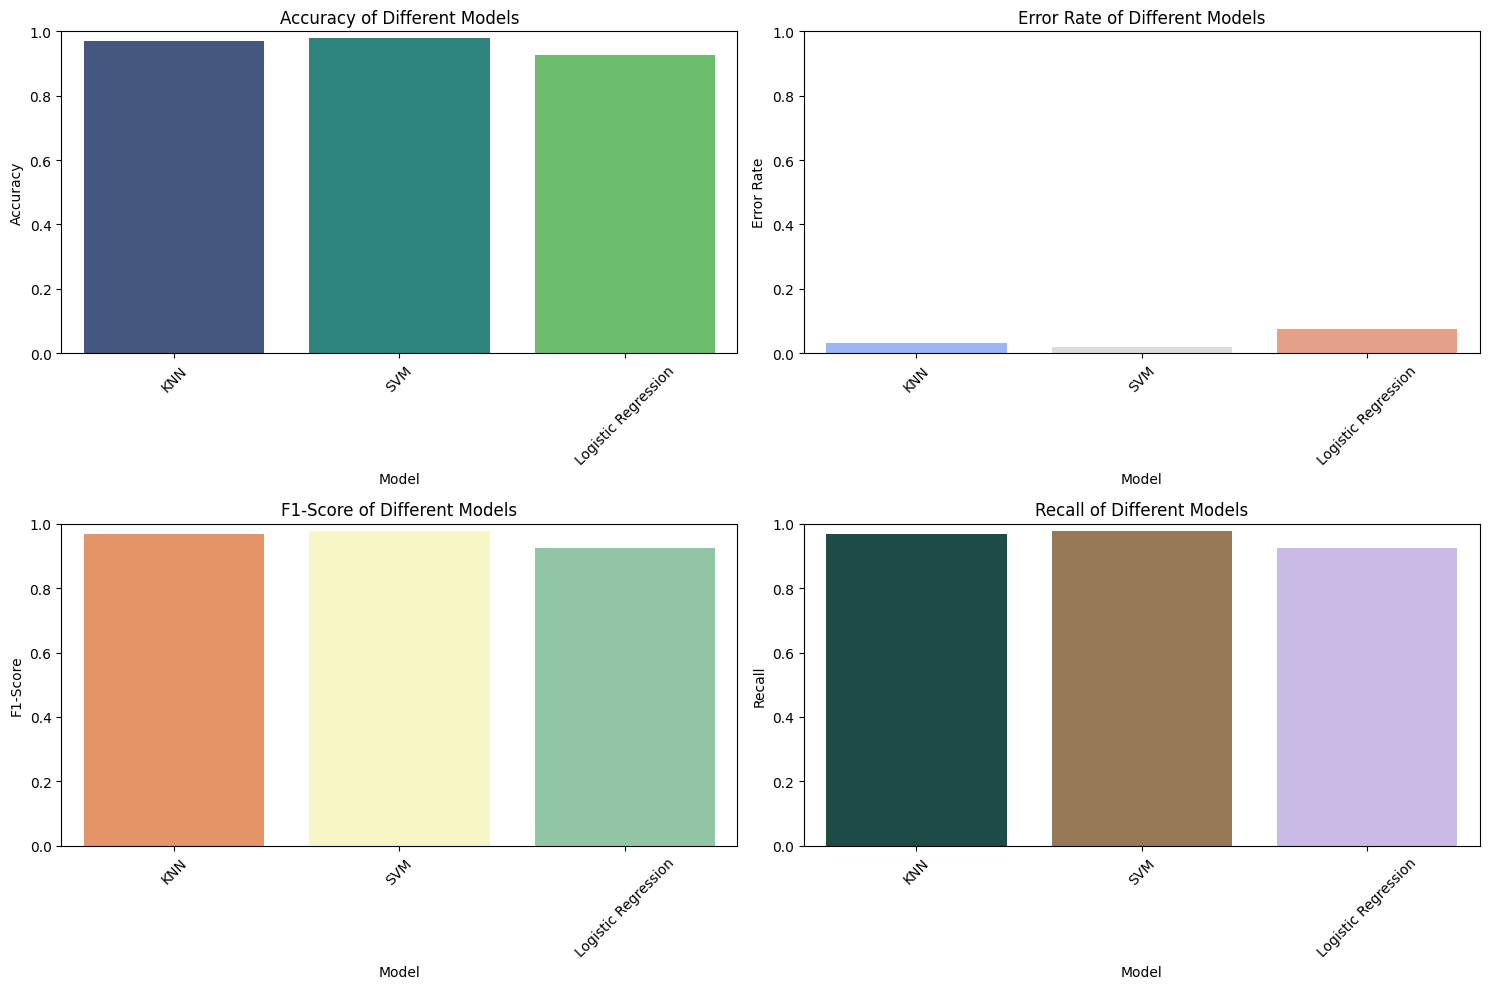

In [ ]:
plot_model_results(model_results)

### Model With PCA

In [ ]:
#Apply PCA (Principal Component Analysis) for dimensionality reduction
# pca = PCA(n_components=100)  # Reduce the dimensions to 50 components
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)
# X_train_pca.shape, X_test_pca.shape

pca_full = PCA()
pca_full.fit(X_train)

explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

n_components = np.argmax(explained_variance >= 0.95) + 1
print(f'Number of components to explain {0.95*100}% variance: {n_components}')

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Number of components to explain 95.0% variance: 154


In [ ]:
model_results_PCA = []

In [ ]:
def train_evaluate_model_pca(name, model, train_data, train_labels, test_data, test_labels):
    print(f'Training And Evaluating The {name} Model:')

    model.fit(train_data, train_labels)

    model_pred = model.predict(test_data)

    print('Classification Report:')
    print(classification_report(test_labels, model_pred))

    accuracy = accuracy_score(test_labels, model_pred)
    recall = recall_score(test_labels, model_pred, average="weighted", zero_division=0)
    f1 = f1_score(test_labels, model_pred, average="weighted", zero_division=0)
    error_rate = 1 - accuracy

    model_results_PCA.append({
        'Model': name,
        'Accuracy': accuracy,
        'Recall': recall,
        'F1-Score': f1,
        'Error Rate': error_rate
    })

In [ ]:
# Train KNN on the reduced data
knn_pca = KNeighborsClassifier(n_neighbors=5)
train_evaluate_model_pca('KNN_PCA', knn_pca, X_train_pca, y_train, X_test_pca, y_test)


Training And Evaluating The KNN_PCA Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
#SVM Model Using PCA
svm_pca = SVC(kernel='rbf', gamma='scale')
train_evaluate_model_pca('SVM_PCA', svm_pca, X_train_pca, y_train, X_test_pca, y_test)

Training And Evaluating The SVM_PCA Model:


In [ ]:
log_reg_pca = LogisticRegression(max_iter=10000)
train_evaluate_model_pca('Logistic Regression_PCA', log_reg_pca, X_train_pca,y_train,X_test_pca,y_test)


NameError: name 'train_evaluate_model_pca' is not defined

<ipython-input-25-a80f2e280b27>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
<ipython-input-25-a80f2e280b27>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Error Rate', data=results_df, palette='coolwarm')
<ipython-input-25-a80f2e280b27>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1-Score', data=results_df, palette='Spectral')
<ipython-input-25-a80f2e280b27>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

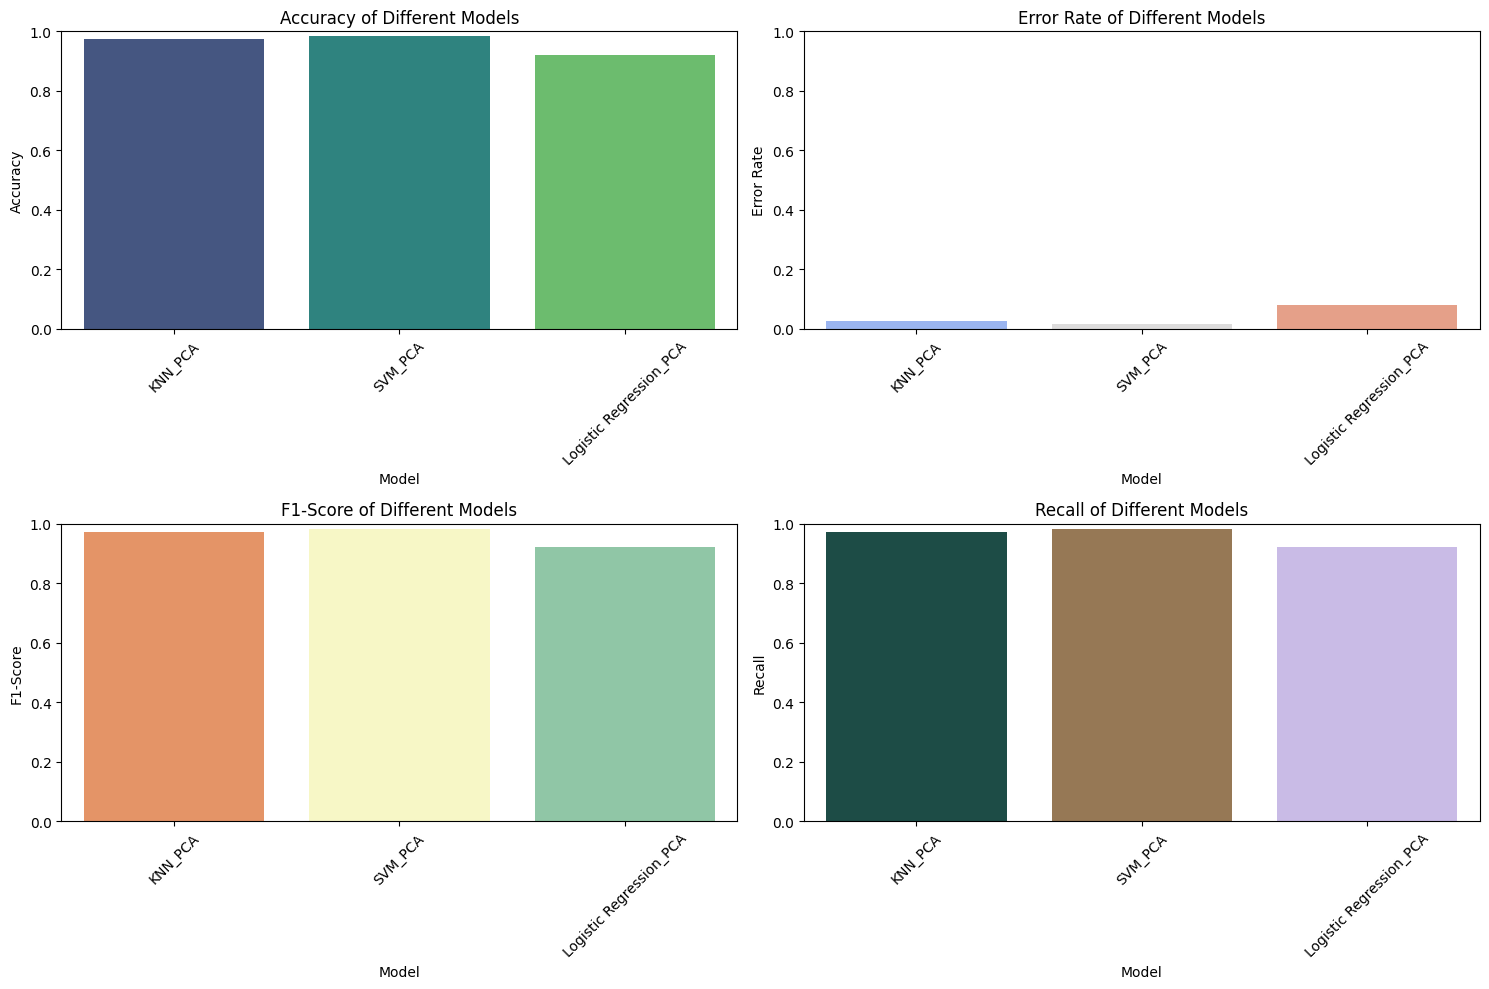

In [ ]:
plot_model_results(model_results_PCA)

In [ ]:
# # Logistic Regression Model Using PCA
# log_reg = LogisticRegression(max_iter=10000)
# print('Evaluate The Logistic Regression Model Using PCA \n')
# train_evaluate_model('Logistic Regression', log_reg, X_train_pca, y_train, X_test_pca, y_test)

In [ ]:

# from sklearn.decomposition import PCA
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, accuracy_score
# import pandas as pd

# # Assuming X_train, y_train, X_test, y_test are already defined

# # Step 1: Apply PCA
# pca = PCA(n_components=0.95)  # Retain 95% of the variance
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

# # Step 2: Set up Logistic Regression
# log_reg = LogisticRegression(max_iter=10000)

# # Step 3: Define the parameter grid for tuning
# param_grid = {
#     'C': [0.1, 1, 10],  # Regularization strengths to test
#     'penalty': ['l2'],  # Fixed to L2 regularization
# }

# # Step 4: Perform grid search with cross-validation
# grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train_pca, y_train)

# # Step 5: Get the best parameters and score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Cross-Validation Score:", best_score)

# # Step 6: Evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test_pca)

# # Step 7: Print evaluation metrics
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))
# print("Test Accuracy:", accuracy_score(y_test, y_pred))



### Model Deployment For GUI Uses





In [ ]:
# import joblib
# joblib.dump(knn_pca, 'knn_model.pkl')
# joblib.dump(svm, 'svm_model.pkl')

### Testing Models on New Data

In [ ]:
#Loading The Models
# svm_model = joblib.load('D:/py venv/svm_model.pkl')
# knn_model = joblib.load('D:/py venv/knn_model.pkl')


In [ ]:
# from PIL import Image, ImageOps
# import numpy as np

# image_path = "C:\Users\DELL\Desktop\9.jpg"
# image = Image.open(image_path)
# image = image.resize((28, 28)).convert('L')  # Resize and convert to grayscale
# image_array = np.array(image)
# if np.mean(image_array) > 127:
#     image = ImageOps.invert(image)
# image_array = np.array(image).astype('float32') / 255.0  # Normalize
# image_vector = image_array.flatten()  # Flatten the image

# plt.imshow(np.reshape(image_array, (28, 28)), cmap='gray')
# plt.axis('off')
# plt.show()

# image_pca = pca.transform([image_vector])

# predicted_label = svm_model.predict(image_pca)
# print(f"Predicted Label: {predicted_label[0]}")